In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical

In [4]:
import tensorflow as tf

In [5]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y

In [7]:
X, y = melspectrogram('/content/drive/MyDrive/data/wavfiles')

In [8]:
print(len(y))

1000


In [10]:
print(np.array(y))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7 7 7 7 3 3 3 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 5 5 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 8 5
 8 5 5 5 8 8 5 5 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 128, 660) (200, 128, 660) (800,) (200,)


In [12]:
print(X_train.min())

-80.0


In [13]:
X_train /= -80
X_test /= -80

In [14]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Feed Forward Neural Network (FFNN)

In [16]:
np.random.seed(23456)
model = Sequential()
model.add(Flatten(input_shape = (128, 660, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ffnn_history = model.fit(X_train,y_train, batch_size=32,validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 11.7480 - accuracy: 0.1289 - val_loss: 3.6921 - val_accuracy: 0.1100
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 2.8983 - accuracy: 0.1517 - val_loss: 2.4101 - val_accuracy: 0.1850
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 2.2691 - accuracy: 0.1901 - val_loss: 2.5317 - val_accuracy: 0.1150
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 2.3955 - accuracy: 0.1436 - val_loss: 2.1831 - val_accuracy: 0.2000
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 2.1604 - accuracy: 0.2057 - val_loss: 2.0537 - val_accuracy: 0.3200
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 2.0809 - accuracy: 0.2699 - val_loss: 2.2924 - val_accuracy: 0.1800
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 1.9906 - accuracy: 0.2549 - val_loss: 2.0095 - val_accuracy: 0.2500
Epoch 8/10

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 84480)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                5406784   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 5,411,626
Trainable params: 5,411,626
Non-trainable params: 0
_________________________________________________________________


In [18]:
metric_score = model.evaluate(X_test, y_test, verbose=0)
print("validation_loss = {:.2f} and validation_accuracy = {:.2f}".format(metric_score[0], metric_score[1]))

validation_loss = 2.48 and validation_accuracy = 0.46


In [19]:
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy: ",train_accuracy)
print("Testing Accuarcy: ",test_accuracy)
print("Validation_loss = {:.2f} and Validation_accuracy = {:.2f}".format(metric_score[0], metric_score[1]))

Training Accuracy:  0.9987499713897705
Testing Accuarcy:  0.46000000834465027
Validation_loss = 2.48 and Validation_accuracy = 0.46


# Constructing a CNN

In [20]:
np.random.seed(23456)
tf.random.set_seed(123)

CNN_model = Sequential(name='CNN')
CNN_model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(128,660,1)))
CNN_model.add(MaxPooling2D(pool_size=(2,4)))
CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),kernel_regularizer =tf.keras.regularizers.l2( l=0.01),activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,4)))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10,kernel_regularizer =tf.keras.regularizers.l2( l=0.01), activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = CNN_model.fit(X_train,y_train, batch_size=32,validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
25/25 [==============================] - 16s 32ms/step - loss: 3.0044 - accuracy: 0.1150 - val_loss: 2.5866 - val_accuracy: 0.1000
Epoch 2/30
25/25 [==============================] - 1s 21ms/step - loss: 2.5655 - accuracy: 0.1185 - val_loss: 2.5085 - val_accuracy: 0.1000
Epoch 3/30
25/25 [==============================] - 1s 21ms/step - loss: 2.4783 - accuracy: 0.1455 - val_loss: 2.4241 - val_accuracy: 0.1400
Epoch 4/30
25/25 [==============================] - 1s 21ms/step - loss: 2.3432 - accuracy: 0.2390 - val_loss: 2.2515 - val_accuracy: 0.2500
Epoch 5/30
25/25 [==============================] - 1s 21ms/step - loss: 2.1700 - accuracy: 0.2961 - val_loss: 2.0067 - val_accuracy: 0.3150
Epoch 6/30
25/25 [==============================] - 1s 21ms/step - loss: 1.9820 - accuracy: 0.3310 - val_loss: 1.9333 - val_accuracy: 0.3350
Epoch 7/30
25/25 [==============================] - 1s 20ms/step - loss: 1.7735 - accuracy: 0.3981 - val_loss: 1.7998 - val_accuracy: 0.3800
Epoch 8/30
2

In [21]:
CNN_model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 658, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 164, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 162, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2457664   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0       

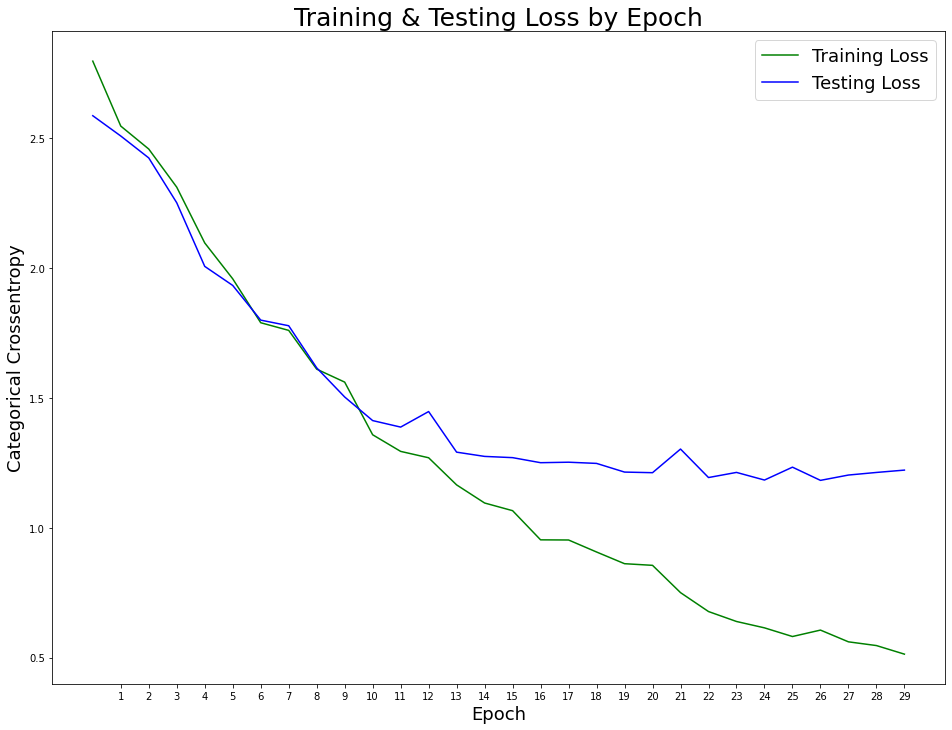

In [22]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(16, 12))
plt.plot(train_loss, label='Training Loss', color='Green')
plt.plot(test_loss, label='Testing Loss', color='Blue')
plt.title('Training & Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,30), range(1,30))
plt.legend(fontsize = 18);

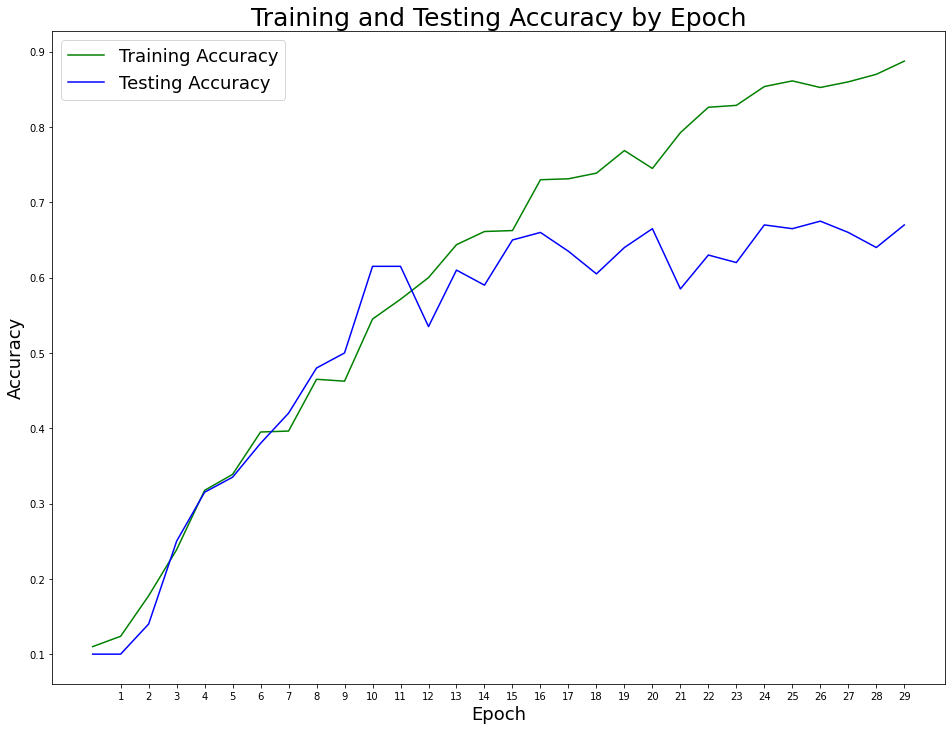

In [23]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
plt.figure(figsize=(16, 12))
plt.plot(train_loss, label='Training Accuracy', color='green')
plt.plot(test_loss, label='Testing Accuracy', color='blue')
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,30), range(1,30))
plt.legend(fontsize = 18);

In [24]:
score = CNN_model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 1.222 and val_acc = 0.670


In [25]:
_, train_acc = CNN_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)
print("Training accuracy: ",train_acc)
print("Testing accuarcy: ",test_acc)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

Training accuracy:  0.9887499809265137
Testing accuarcy:  0.6700000166893005
val_loss = 1.222 and val_acc = 0.670


In [27]:
print(X_test.shape)
predictions = CNN_model.predict(X_test)

(200, 128, 660, 1)


In [28]:
predictions.shape

(200, 10)

In [29]:
for i in range(10): 
    print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0: 20
1: 20
2: 20
3: 20
4: 20
5: 20
6: 20
7: 20
8: 20
9: 20


In [30]:
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predictions if np.argmax(prediction) == i])}')

0: 10
1: 17
2: 13
3: 20
4: 25
5: 25
6: 24
7: 29
8: 19
9: 18


In [31]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix.shape

(10, 10)

In [32]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,8,0,0,2,1,4,0,3,0,2
1,1,13,2,0,3,1,0,0,0,0
2,0,1,5,0,0,6,2,3,3,0
3,0,0,1,16,0,1,1,0,1,0
4,0,0,0,1,16,0,1,0,2,0
5,0,0,3,1,0,11,0,4,0,1
6,0,0,0,0,1,0,19,0,0,0
7,1,0,0,0,0,0,0,19,0,0
8,0,2,2,0,1,0,1,0,13,1
9,0,1,0,0,3,2,0,0,0,14


In [33]:
labels_dict = {
    0: 'jazz',
    1: 'reggae',
    2: 'rock',
    3: 'blues',
    4: 'hiphop',
    5: 'country',
    6: 'metal',
    7: 'classical',
    8: 'disco',
    9: 'pop'
}

In [34]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,reggae,rock,blues,hiphop,country,metal,classical,disco,pop
jazz,8,0,0,2,1,4,0,3,0,2
reggae,1,13,2,0,3,1,0,0,0,0
rock,0,1,5,0,0,6,2,3,3,0
blues,0,0,1,16,0,1,1,0,1,0
hiphop,0,0,0,1,16,0,1,0,2,0
country,0,0,3,1,0,11,0,4,0,1
metal,0,0,0,0,1,0,19,0,0,0
classical,1,0,0,0,0,0,0,19,0,0
disco,0,2,2,0,1,0,1,0,13,1
pop,0,1,0,0,3,2,0,0,0,14


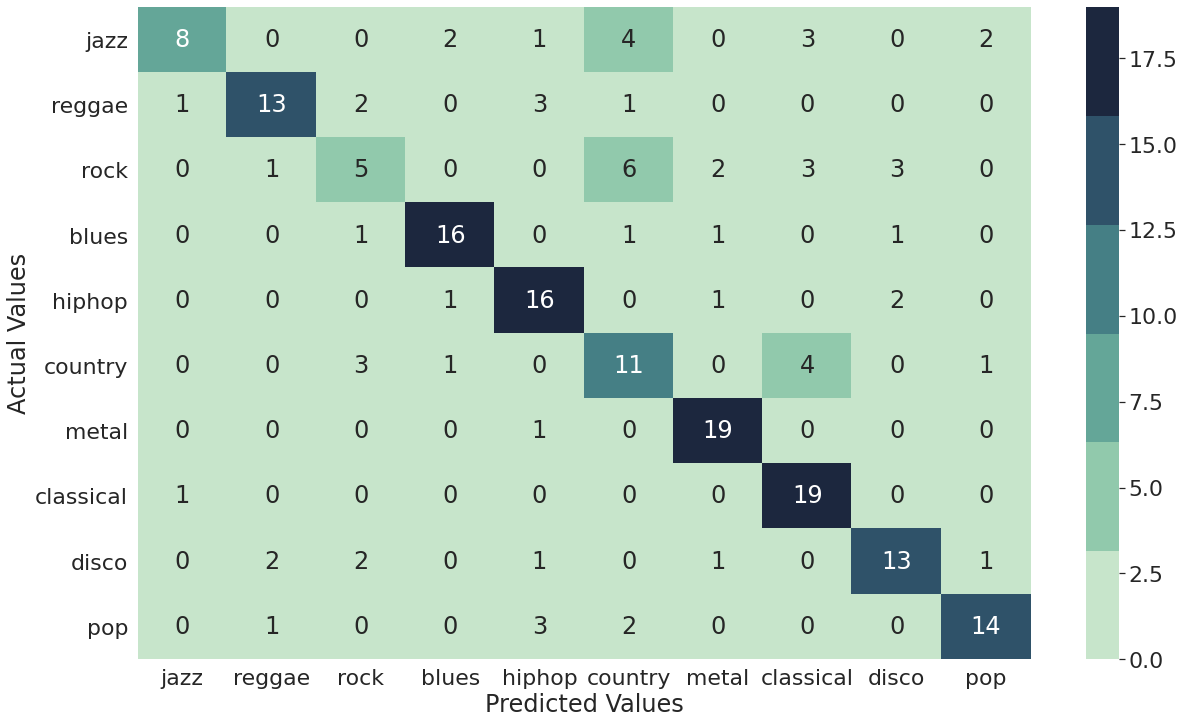

In [35]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

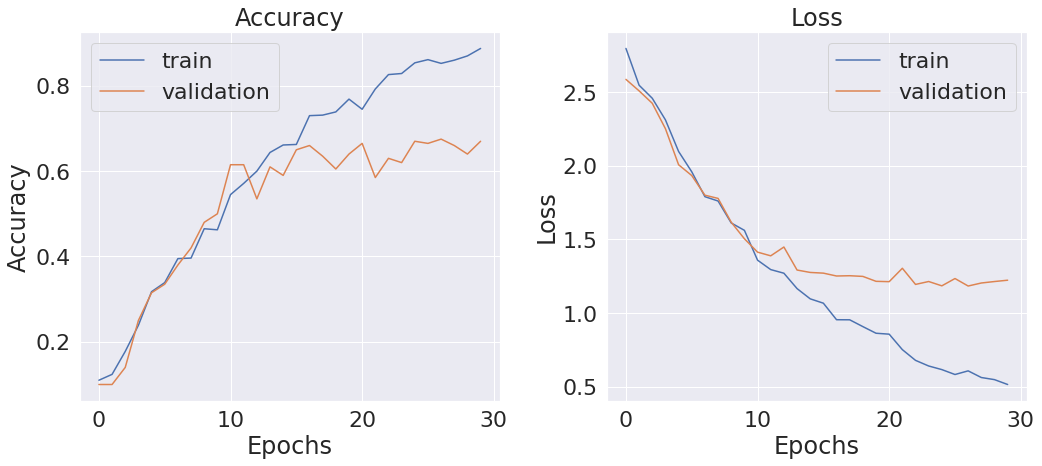

In [36]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlGn):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [39]:
preds = np.argmax(CNN_model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
print(cm.shape)

(10, 10)


Normalized confusion matrix


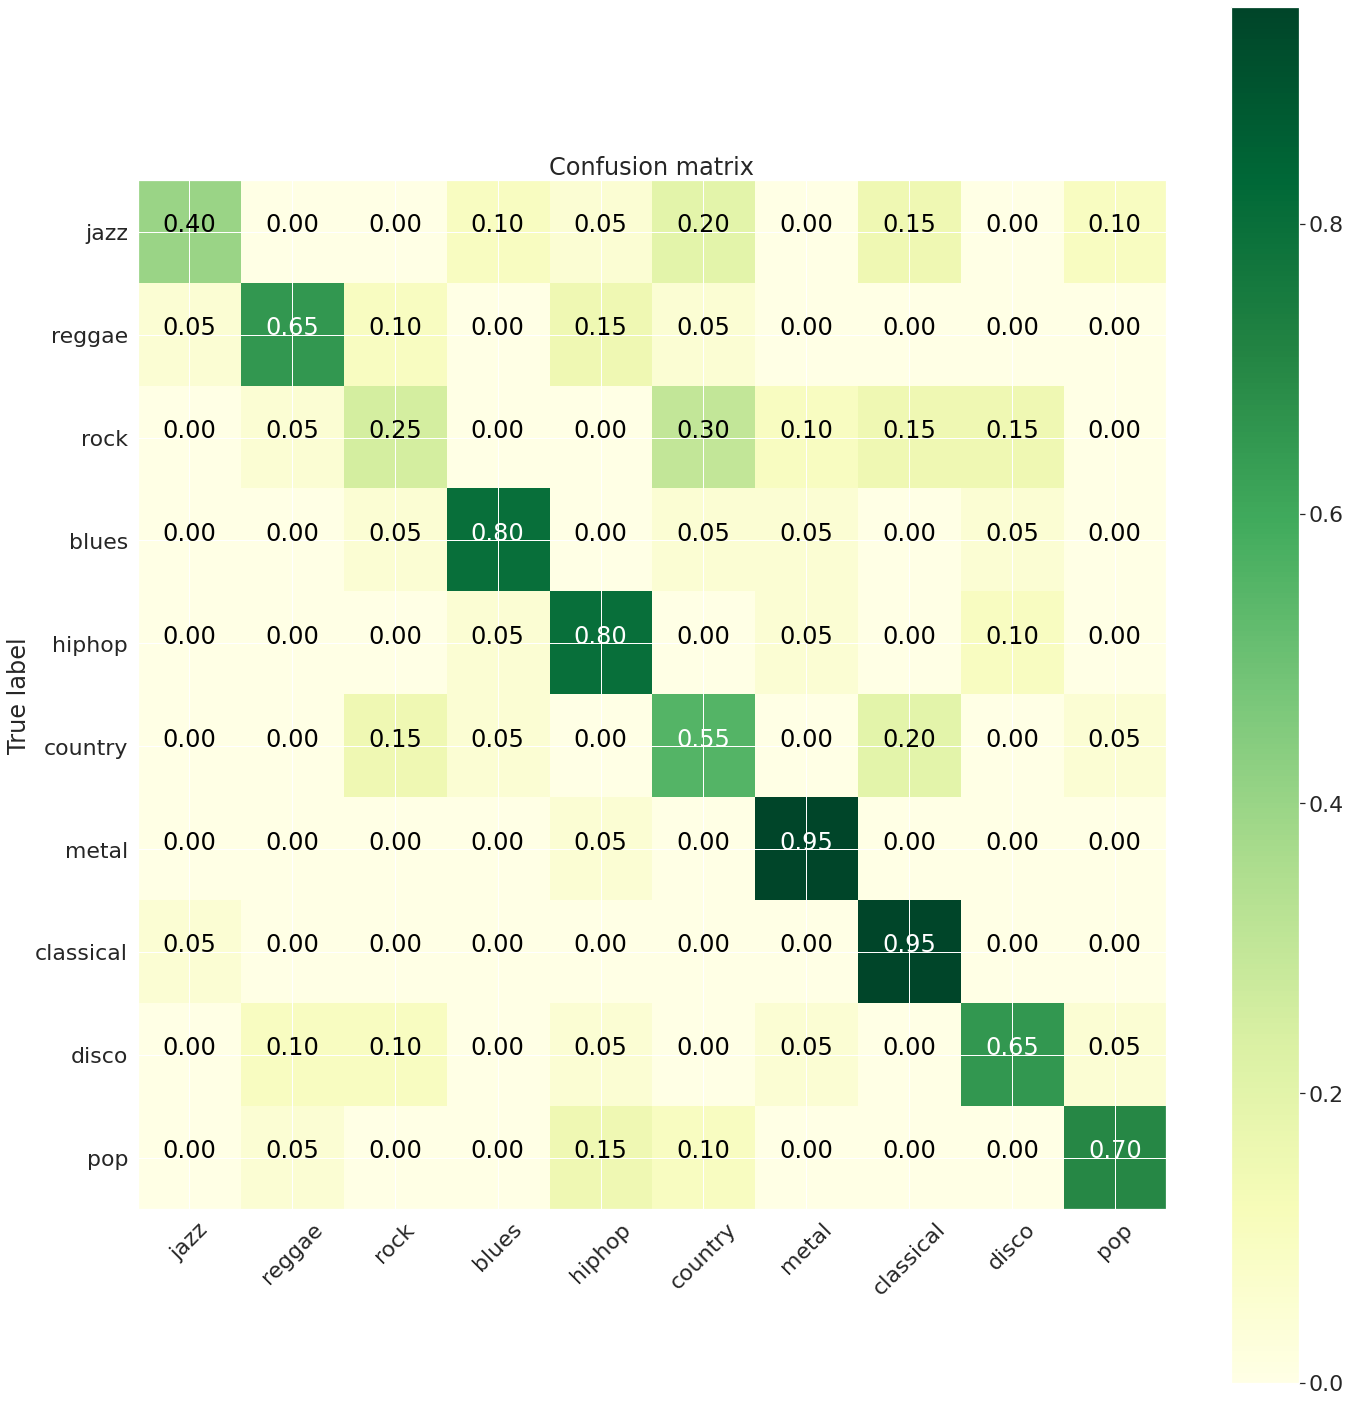

In [42]:
import collections
import itertools 
orderedDict = collections.OrderedDict()
from collections import OrderedDict
label_dict = {
        'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9
    }
keys = OrderedDict(sorted(label_dict.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(20,20))
plot_confusion_matrix(conf_matrix, keys, normalize=True)